## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# SNS datasets

In [2]:
x=sns.get_dataset_names()
print(x)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# Loading DataSet

In [3]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Understanding the basic INFO

In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## Analysing using Stats

In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


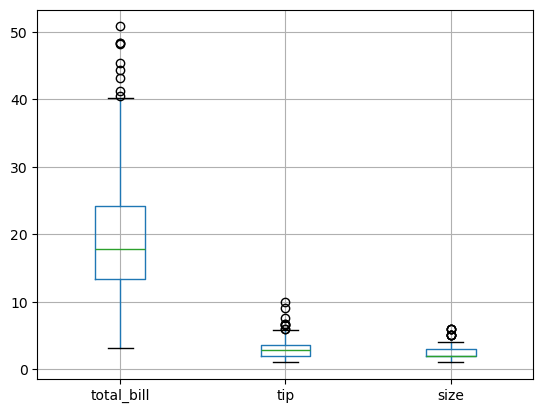

In [10]:
df.boxplot(column=["total_bill","tip","size"])
plt.show()

## here we can see that there are some outliers in all the numeric variables or feature
## now to replace the outliers with mean or median or mode values we have to understand the skewnwess of the data

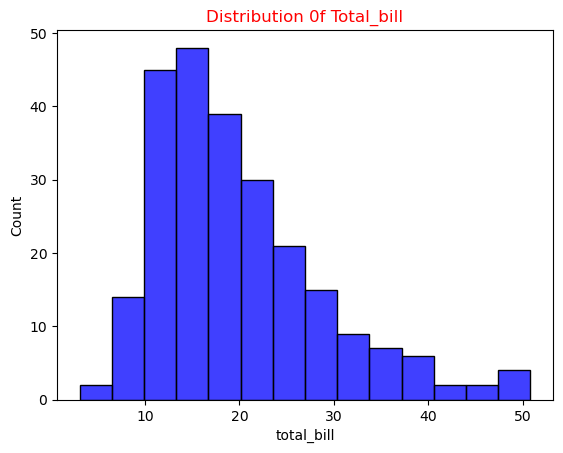

In [12]:
sns.histplot(x='total_bill',data=df,color="blue")
plt.title("Distribution 0f Total_bill", color = "red")
plt.show()

## the data here is right skewed that defines that the  mean value is geater than median and mode.
## As there are ouliers in the total bill it is advised to replace them with median

# Using IQR methhod

from scipy import stats

In [16]:
iqr_value = stats.iqr(df["total_bill"])

In [17]:
# calculating Iqr manually
q1 = np.percentile(df["total_bill"],25)
q2 = np.percentile(df["total_bill"],50)
q3 = np.percentile(df["total_bill"],75)
IQR = q3-q1
print(IQR)

10.779999999999998


In [18]:
q1 = df["total_bill"].quantile(0.25)
q3 = df["total_bill"].quantile(0.75)
IQR = q3-q1
print(IQR)

10.779999999999998


# Detecting outliers using IQR method

In [20]:
low_level = q1-1.5*IQR
high_level = q3+1.5*IQR
for i in df["total_bill"]:
    if i<low_level or i>high_level:
        print(i)

48.27
44.3
41.19
48.17
50.81
45.35
40.55
43.11
48.33


In [21]:
outliers = ((df["total_bill"]<low_level)|(df["total_bill"]>high_level))
df[outliers].index

Index([59, 102, 142, 156, 170, 182, 184, 197, 212], dtype='int64')

# filling them with median valuse

In [23]:
df.loc[outliers,"total_bill"] = df["total_bill"].median()

In [24]:
df.loc[outliers]

,total_bill,tip,sex,smoker,day,time,size
59,17.795,6.73,Male,No,Sat,Dinner,4
102,17.795,2.50,Female,Yes,Sat,Dinner,3
142,17.795,5.00,Male,No,Thur,Lunch,5
156,17.795,5.00,Male,No,Sun,Dinner,6
170,17.795,10.00,Male,Yes,Sat,Dinner,3
182,17.795,3.50,Male,Yes,Sun,Dinner,3
184,17.795,3.00,Male,Yes,Sun,Dinner,2
197,17.795,5.00,Female,Yes,Thur,Lunch,4
212,17.795,9.00,Male,No,Sat,Dinner,4


In [25]:
df.loc[59]

total_bill    17.795
tip             6.73
sex             Male
smoker            No
day              Sat
time          Dinner
size               4
Name: 59, dtype: object

In [26]:
df["total_bill"].median()

17.7875

# Using Z score method to detect the oultiers

In [28]:
df["z_score"] = stats.zscore(df["tip"])
df.head()

,total_bill,tip,sex,smoker,day,time,size,z_score
0,16.99,1.01,Female,No,Sun,Dinner,2,-1.439947
1,10.34,1.66,Male,No,Sun,Dinner,3,-0.969205
2,21.01,3.50,Male,No,Sun,Dinner,3,0.363356
3,23.68,3.31,Male,No,Sun,Dinner,2,0.225754
4,24.59,3.61,Female,No,Sun,Dinner,4,0.443020


In [29]:
outliers = df["z_score"]>3
outliers

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: z_score, Length: 244, dtype: bool

In [30]:
df.loc[outliers,"tip"] = df["tip"].median()

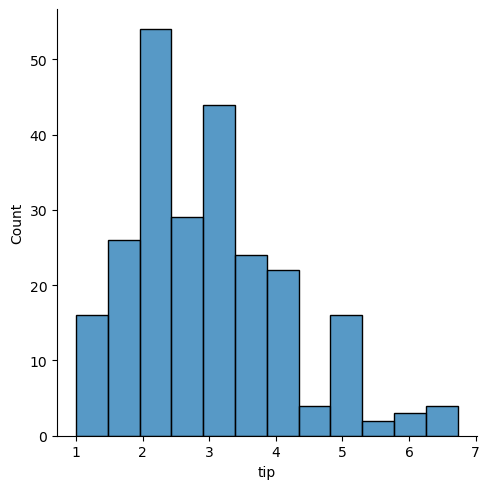

In [31]:
sns.displot(x="tip",data=df)
plt.show()  ## Right skewed

In [32]:
df["sex"].isnull().sum()

0

In [33]:
df["sex"].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [34]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

# Visualization

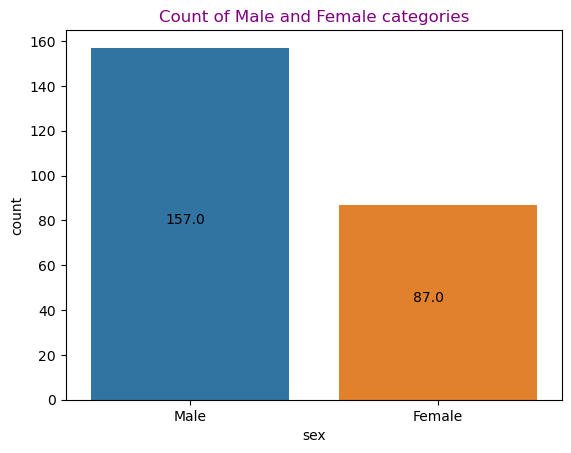

In [49]:
ax=sns.countplot(x=df["sex"],data=df)
for i in ax.patches:
    x=i.get_x()
    y=i.get_height()
    ax.annotate(y,(x+0.3,y/2))
plt.title("Count of Male and Female categories",color='purple')
plt.show()

In [43]:
ax

<Axes: title={'center': 'Count of Male and Female'}, xlabel='sex', ylabel='count'>

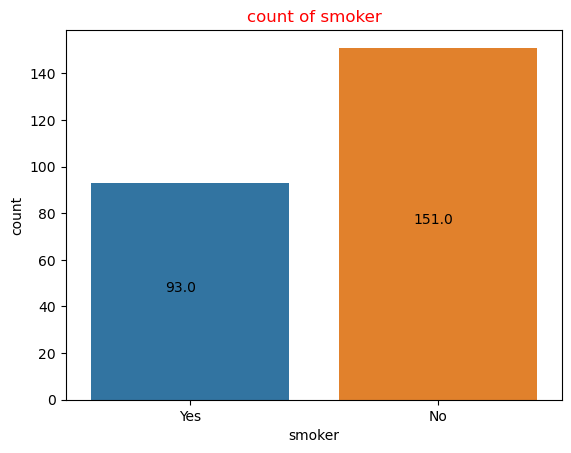

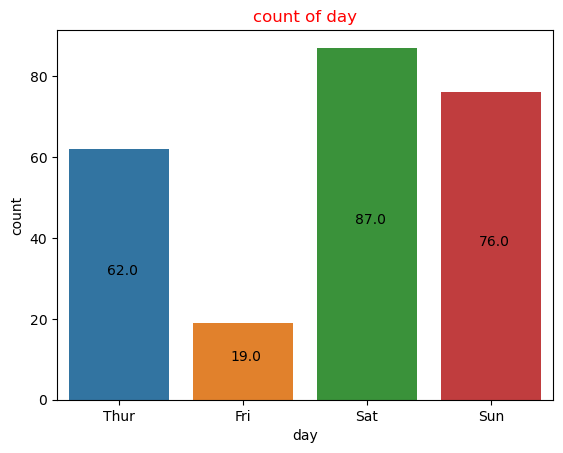

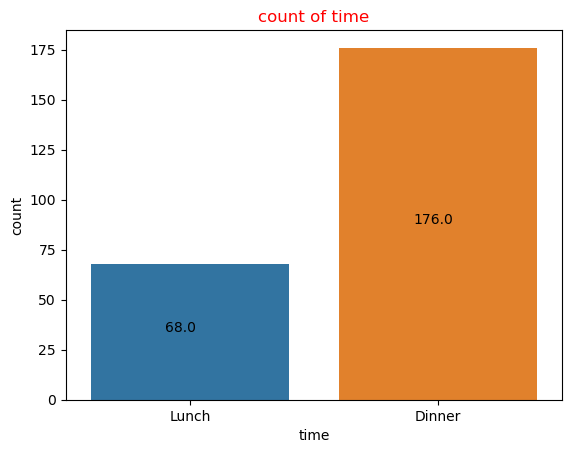

In [67]:
cols = ["smoker","day","time"]

for i in cols:
    title = "count of " + i
    ax=sns.countplot(x=i,data=df)
    for i in ax.patches:
        x=i.get_x()
        y=i.get_height()
        ax.annotate(y,(x+0.3,y/2))
    plt.title(title,color="red")
    plt.show()

Rectangle(xy=(-0.4, 0), width=0.4, height=60, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=33, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=97, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=54, angle=0)


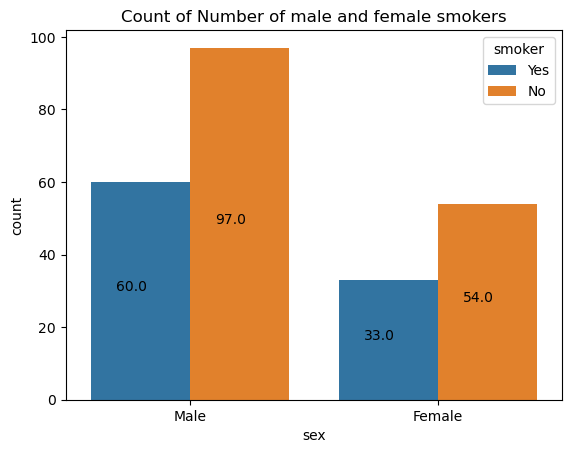

In [73]:
ax=sns.countplot(x="sex",data=df,hue='smoker')
for i in ax.patches:
    print(i)
    x=i.get_x()
    y=i.get_height()
    ax.annotate(y,(x+0.1,y/2))
plt.title("Count of Number of male and female smokers")
plt.show()

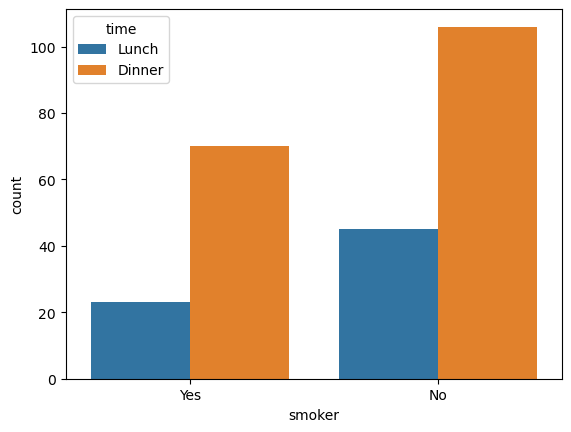

In [78]:
ax=sns.countplot(x='smoker',data=df,hue='time')
plt.show()

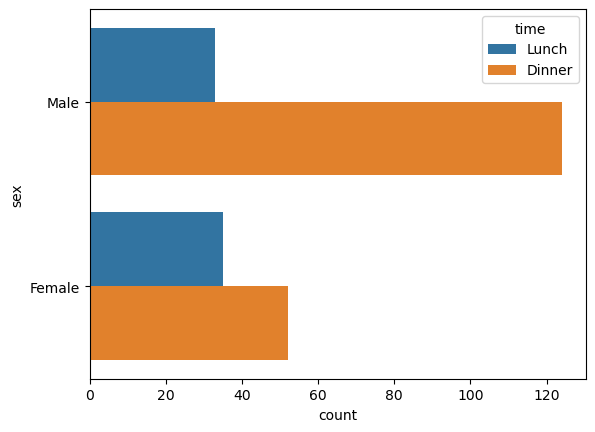

In [76]:
sns.countplot(y="sex",data=df,hue="time")
plt.show()

In [79]:
df['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

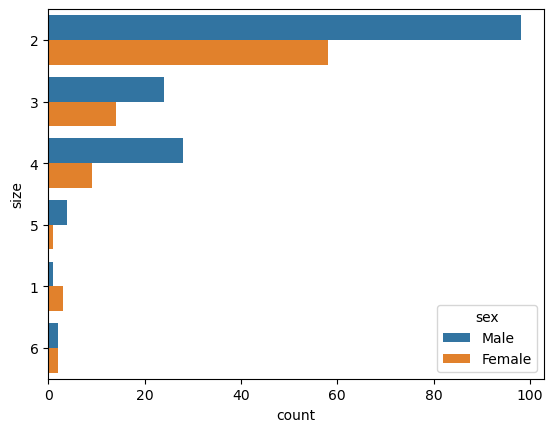

In [91]:
sns.countplot(y="size",data=df,hue='sex',order=df['size'].value_counts().index)
plt.show()